<h1> Reconnaissance de cartes, entraînement </h1>


<h3>Import des librairies :</h3>

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model, load_model

In [2]:
data_dir = pathlib.Path('../data/train')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8785


In [4]:
batch_size = 32
img_height = 280
img_width = 220

<h3>Création des datasets</h3>


In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8785 files belonging to 32 classes.
Using 7028 files for training.


In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8785 files belonging to 32 classes.
Using 1757 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['10_ca', '10_co', '10_pi', '10_tr', '7_ca', '7_co', '7_pi', '7_tr', '8_ca', '8_co', '8_pi', '8_tr', '9_ca', '9_co', '9_pi', '9_tr', 'A_ca', 'A_co', 'A_pi', 'A_tr', 'D_ca', 'D_co', 'D_pi', 'D_tr', 'J_ca', 'J_co', 'J_pi', 'J_tr', 'K_ca', 'K_co', 'K_pi', 'K_tr']
32


In [18]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 280, 220, 3)
(32,)


In [19]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[28]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<h3>Définition du modèle d'entraînement</h3>

In [21]:
num_classes = 32

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(
  optimizer='Adamax',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

<h3> Entraînement </h3>

In [23]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=2
)

Epoch 1/2
220/220 [==============================] - 164s 744ms/step - loss: 1.7838 - accuracy: 0.5116 - val_loss: 0.0588 - val_accuracy: 0.9920
Epoch 2/2
220/220 [==============================] - 169s 769ms/step - loss: 0.0429 - accuracy: 0.9896 - val_loss: 0.0144 - val_accuracy: 0.9977


In [24]:
# Sauvegarde du modèle
filepath = './saved_model'
save_model(model, filepath)

INFO:tensorflow:Assets written to: ./saved_model\assets


['8_tr', '8_pi', '8_tr']
['K_co', '7_pi', 'J_tr']
['A_ca', 'D_ca', '9_co']


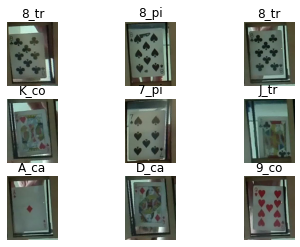

In [27]:
# Test du modèle
results = []
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    a = model.predict_step(images)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    b = a[i].numpy()
    b = predict(b)
    results.append(b)
    if(i == 2):
        print(results)
        results = []
    if(i == 5):
        print(results)
        results = []
    if(i == 8):
        print(results)
        results = []


In [26]:
def predict(b):
    indiceMax = 0
    Max = b[0]
    for i in range(1,32):
        if (b[i] > Max):
            Max = b[i]
            indiceMax = i #Calcul de la probabilité maximale
    if (indiceMax == 0):
        return('10_ca')
    if (indiceMax == 1):
        return('10_co')
    if (indiceMax == 2):
        return('10_pi')
    if (indiceMax == 3):
        return('10_tr')
    if (indiceMax == 4):
        return('7_ca')
    if (indiceMax == 5):
        return('7_co')
    if (indiceMax == 6):
        return('7_pi')
    if (indiceMax == 7):
        return('7_tr')
    if (indiceMax == 8):
        return('8_ca')
    if (indiceMax == 9):
        return('8_co')
    if (indiceMax == 10):
        return('8_pi')
    if (indiceMax == 11):
        return('8_tr')
    if (indiceMax == 12):
        return('9_ca')
    if (indiceMax == 13):
        return('9_co')
    if (indiceMax == 14):
        return('9_pi')
    if (indiceMax == 15):
        return('9_tr')
    if (indiceMax == 16):
        return('A_ca')
    if (indiceMax == 17):
        return('A_co')
    if (indiceMax == 18):
        return('A_pi')
    if (indiceMax == 19):
        return('A_tr')
    if (indiceMax == 20):
        return('D_ca')
    if (indiceMax == 21):
        return('D_co')
    if (indiceMax == 22):
        return('D_pi')
    if (indiceMax == 23):
        return('D_tr')
    if (indiceMax == 24):
        return('J_ca')
    if (indiceMax == 25):
        return('J_co')
    if (indiceMax == 26):
        return('J_pi')
    if (indiceMax == 27):
        return('J_tr')
    if (indiceMax == 28):
        return('K_ca')
    if (indiceMax == 29):
        return('K_co')
    if (indiceMax == 30):
        return('K_pi')
    if (indiceMax == 31):
        return('K_tr')
    